IMAGE COLORISATION


In [1]:
print("hello")

hello


In [2]:
!pip install opencv-python

In [3]:
!pip install tensorflow-datasets



In [4]:
!pip install tensorflow tensorflow-datasets gcsfs


In [5]:
import tensorflow_datasets as tfds
dataset = tfds.load('cifar10', split='train', as_supervised=True)


In [ ]:
import cv2
import os
import numpy as np


image = cv2.imread("D:\Setu\DIP_project\image3.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to Grayscale
cv2.imshow("Grayscale Image", image)

'''cv2.waitKey(0)
cv2.destroyAllWindows()'''


'cv2.waitKey(0)\ncv2.destroyAllWindows()'

In [7]:
!pip install matplotlib


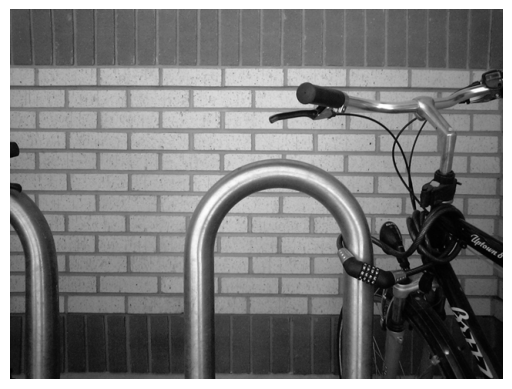

In [ ]:

import matplotlib.pyplot as plt

plt.imshow(gray, cmap="gray")  
plt.axis("off")  
plt.show()

In [9]:
def preprocess_image(image_path): 
    image = cv2.imread("D:\Setu\DIP_project\image3.jpg")  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    image = cv2.resize(image, (299, 299))  # Resize to 299x299
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    gray = gray / 255.0  # Normalize grayscale image to [0, 1]
    image = (image / 127.5) - 1  # Normalize color image to [-1, 1]
    return gray, image


In [10]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Load pre-trained Inception-ResNet-v2 model (without top layer)
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

# Extract features from grayscale image
input_layer = Input(shape=(299, 299, 1))  # Grayscale image input
features = base_model(input_layer)

feature_extractor = Model(inputs=input_layer, outputs=features)
feature_extractor.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 299, 299, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_resnet_v2             │ (None, 8, 8, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,336,736 (207.28 MB)

 Trainable params: 54,276,192 (207.05 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [11]:
from tensorflow.keras.layers import Conv2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model

# Define grayscale input
input_gray = Input(shape=(299, 299, 1))

# Extract features using Inception-ResNet-v2
features = base_model(input_gray)

# Add upsampling layers to predict color channels
x = Conv2D(256, (3, 3), activation='relu', padding='same')(features)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(2, (3, 3), activation='tanh', padding='same')(x)  # Predict 'ab' channels

# Final model
colorization_model = Model(inputs=input_gray, outputs=x)
colorization_model.compile(optimizer='adam', loss='mse')
colorization_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 299, 299, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_resnet_v2             │ (None, 8, 8, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_203 (Conv2D)             │ (None, 8, 8, 256)      │     3,539,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_204 (Conv2D)             │ (None, 16, 16, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_205 (Conv2D)             │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_206 (Conv2D)             │ (None, 32, 32, 2)      │         1,154 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,245,922 (222.19 MB)

 Trainable params: 58,185,378 (221.96 MB)

 Non-trainable params: 60,544 (236.50 KB)

In [12]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


d:\Setu\DIP_project\venV\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step


C:\Users\setug\AppData\Local\Temp\ipykernel_13476\2640993636.py:64: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 205 negative Z values that have been clipped to zero
  colorized_img = lab2rgb(lab_result)


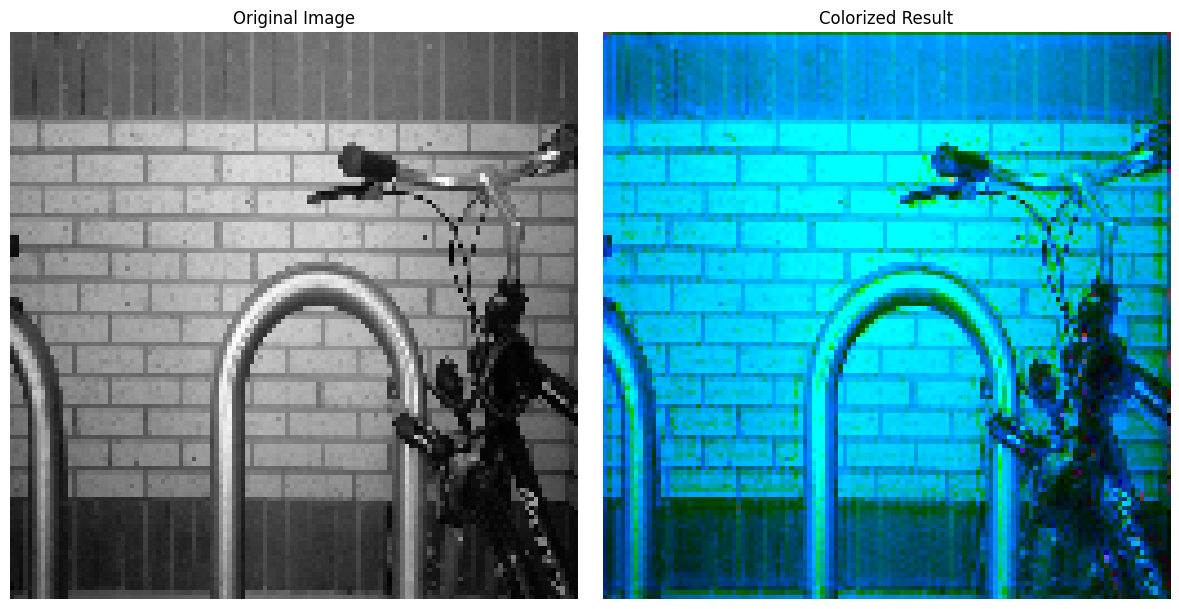

Colorized image saved to D:/Setu/DIP_project/colorized_image3.jpg


: 

In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer, BatchNormalization

# Define image size
IMG_SIZE = 128

# Build the colorization model
def build_model():
    model = Sequential([
        InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        
        Conv2D(2, (3, 3), activation='tanh', padding='same')  # Output AB channels
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Initialize model
colorization_model = build_model()



def colorize_image(image_path, model, img_size=128):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    original_img = img.copy()
    
    img = cv2.resize(img, (img_size, img_size)) / 255.0
    
    lab = rgb2lab(img)
    L = lab[:, :, 0].reshape(img_size, img_size, 1)  
   
    L_input = np.expand_dims(L, axis=0)  
    
    ab_pred = model.predict(L_input) * 128  
    
    lab_result = np.zeros((img_size, img_size, 3))
    lab_result[:, :, 0] = L[:, :, 0]  
    lab_result[:, :, 1:] = ab_pred[0]  
    
    # Convert back to RGB
    colorized_img = lab2rgb(lab_result)
    
    # Ensure values are in valid range [0, 1]
    colorized_img = np.clip(colorized_img, 0, 1)
    
    return original_img, colorized_img


image_path = "D:/Setu/DIP_project/image3.jpg"

try:
    original, colorized = colorize_image(image_path, colorization_model)
    
    plt.figure(figsize=(12, 6))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.resize(original, (IMG_SIZE, IMG_SIZE)))
    plt.axis('off')
    
    # Colorized version
    plt.subplot(1, 2, 2)
    plt.title("Colorized Result")
    plt.imshow(colorized)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Save the colorized image
    output_path = "D:/Setu/DIP_project/colorized_image3.jpg"
    plt.imsave(output_path, colorized)
    print(f"Colorized image saved to {output_path}")
    
except Exception as e:
    print(f"Error: {e}")

Loading existing model...
Error loading model: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}
Training new model...
Loading Flowers dataset...
Dataset loaded with 3670 images
Processing images and training model...
Processed 0 images


d:\Setu\DIP_project\venV\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training batch 1 with 32 images...
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - loss: 0.5926
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.4223
Training batch 2 with 32 images...
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.2572
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.1528
Training batch 3 with 32 images...
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.1237
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.1043
Processed 100 images
Training batch 4 with 32 images...
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 0.0788
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.0678
Training batch 5 with 32 images...
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.0678
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.0523
Training batch 6 with 32 images...
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.0491
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - loss: 0.0464
Processed 200 images
Training batch 7

Processed 1500 images
Model training complete and saved!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


C:\Users\setug\AppData\Local\Temp\ipykernel_16468\1410901112.py:143: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 10 negative Z values that have been clipped to zero
  colorized_img = lab2rgb(lab_result)


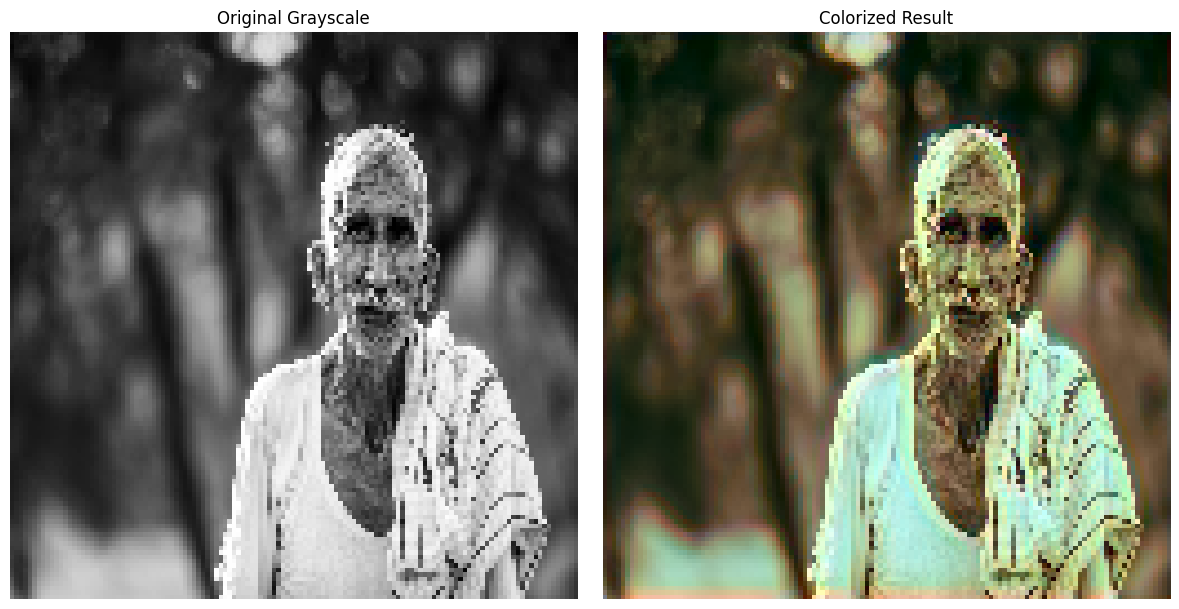

Colorized image saved to D:/Setu/DIP_project/colorized_image3.jpg


In [ ]:
import tensorflow_datasets as tfds
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, InputLayer, BatchNormalization
import os


IMG_SIZE = 128


def build_model():
    model = Sequential([
        InputLayer(input_shape=(IMG_SIZE, IMG_SIZE, 1)),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        
        Conv2D(2, (3, 3), activation='tanh', padding='same')  
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


def prepare_training_data(image):
    
    if len(image.shape) != 3 or image.shape[2] != 3:
        
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        
    
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
    
    
    lab = rgb2lab(image)
    
    
    L = lab[:, :, 0].reshape(IMG_SIZE, IMG_SIZE, 1)
    ab = (lab[:, :, 1:] / 128).reshape(IMG_SIZE, IMG_SIZE, 2)  # Normalize ab
    
    return L, ab


def train_with_flowers_dataset():
    
    print("Loading Flowers dataset...")
    dataset, info = tfds.load('tf_flowers', split='train', with_info=True, as_supervised=True)
    print(f"Dataset loaded with {info.splits['train'].num_examples} images")
    
    
    colorization_model = build_model()
    
    
    batch_size = 32
    X_train, Y_train = [], []
    
    print("Processing images and training model...")
    
    for i, (image, _) in enumerate(tfds.as_numpy(dataset)):
        try:
            L, ab = prepare_training_data(image)
            X_train.append(L)
            Y_train.append(ab)
        except Exception as e:
            print(f"Error processing image {i}: {e}")
            continue
        
        
        if len(X_train) >= batch_size:
            X_batch = np.array(X_train)
            Y_batch = np.array(Y_train)
            
            print(f"Training batch {i//batch_size+1} with {len(X_batch)} images...")
            colorization_model.fit(X_batch, Y_batch, batch_size=16, epochs=2, verbose=1)
            
            
            X_train, Y_train = [], []
        
        
        if i % 100 == 0:
            print(f"Processed {i} images")
            
        
        if i >= 1500:  
            break
    
    
    save_model(colorization_model, "flower_colorization_model.h5")
    print("Model training complete and saved!")
    
    return colorization_model

# Function to colorize an image
def colorize_image(image_path, model, img_size=128):
    
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Could not read image at {image_path}")
    
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
    if len(img.shape) == 2:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    elif len(img.shape) == 3 and img.shape[2] == 3:
        
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    
    
    original_img = img.copy()
    
    
    img = cv2.resize(img, (img_size, img_size)) / 255.0
    
    
    lab = rgb2lab(img)
    L = lab[:, :, 0].reshape(img_size, img_size, 1)  
    
    
    L_input = np.expand_dims(L, axis=0)  
    
    
    ab_pred = model.predict(L_input) * 128 
    
    
    lab_result = np.zeros((img_size, img_size, 3))
    lab_result[:, :, 0] = L[:, :, 0]  
    lab_result[:, :, 1:] = ab_pred[0]  
    
   
    colorized_img = lab2rgb(lab_result)
    
    
    colorized_img = np.clip(colorized_img, 0, 1)
    
    return original_img, colorized_img


def main():
    
    if os.path.exists("flower_colorization_model.h5"):
        print("Loading existing model...")
        try:
            colorization_model = load_model("flower_colorization_model.h5")
        except Exception as e:
            print(f"Error loading model: {e}")
            print("Training new model...")
            colorization_model = train_with_flowers_dataset()
    else:
        print("Training new model...")
        colorization_model = train_with_flowers_dataset()
    
    
    image_path = "D:\Setu\DIP_project\man-8554081_1280.jpg"
    
    
    try:
        original, colorized = colorize_image(image_path, colorization_model)
        
        
        plt.figure(figsize=(12, 6))
        
        
        plt.subplot(1, 2, 1)
        plt.title("Original Grayscale")
        gray_img = cv2.cvtColor(cv2.resize(original, (IMG_SIZE, IMG_SIZE)), cv2.COLOR_RGB2GRAY)
        plt.imshow(gray_img, cmap='gray')
        plt.axis('off')
        
        
        plt.subplot(1, 2, 2)
        plt.title("Colorized Result")
        plt.imshow(colorized)
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        
        output_path = "D:/Setu/DIP_project/colorized_image3.jpg"
        plt.imsave(output_path, colorized)
        print(f"Colorized image saved to {output_path}")
        
    except Exception as e:
        print(f"Error: {e}")

# Run the main function
if __name__ == "__main__":
    main()